In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("earthquake.csv")
data.columns


Index(['Time', 'Date', 'Latitude', 'Longitude', 'Depth', 'Mag', 'magType',
       'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [4]:
data = data[[ 'Time', 'Date', 'Latitude', 'Longitude', 'Depth', 'Mag']].rename(columns = {'Mag':'Magnitude'})
data.head()

,Time,Date,Latitude,Longitude,Depth,Magnitude
0,13:33:14,05-11-2023,24.2120,125.2916,24.636,5.9
1,16:02:00,05-10-2023,-15.6002,-174.6077,210.097,7.6
2,06:02:15,05-08-2023,-56.0059,-121.4208,10.000,5.9
3,17:47:16,05-05-2023,41.5046,141.9956,62.297,5.9
4,12:58:03,05-05-2023,37.4932,137.2783,8.222,5.6


In [5]:
data

,Time,Date,Latitude,Longitude,Depth,Magnitude
0,13:33:14,05-11-2023,24.2120,125.2916,24.636,5.9
1,16:02:00,05-10-2023,-15.6002,-174.6077,210.097,7.6
2,06:02:15,05-08-2023,-56.0059,-121.4208,10.000,5.9
3,17:47:16,05-05-2023,41.5046,141.9956,62.297,5.9
4,12:58:03,05-05-2023,37.4932,137.2783,8.222,5.6
...,...,...,...,...,...,...
18924,07:39:09,01-05-1985,-0.6660,67.2900,10.000,5.6
18925,02:17:34,01-04-1985,-26.0570,-177.5180,132.700,5.8
18926,23:58:34,01-03-1985,-21.6160,-174.1100,33.000,5.6
18927,22:29:24,01-02-1985,-14.6580,-175.3530,33.000,5.7


In [6]:
import datetime
import time

timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m-%d-%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        # print('ValueError')
        timestamp.append('ValueError')
timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values
final_data = data.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data

,Latitude,Longitude,Depth,Magnitude,Timestamp
0,24.2120,125.2916,24.636,5.9,1.683792e+09
1,-15.6002,-174.6077,210.097,7.6,1.683715e+09
2,-56.0059,-121.4208,10.000,5.9,1.683506e+09
3,41.5046,141.9956,62.297,5.9,1.683289e+09
4,37.4932,137.2783,8.222,5.6,1.683272e+09
...,...,...,...,...,...
18924,-0.6660,67.2900,10.000,5.6,4.737389e+08
18925,-26.0570,-177.5180,132.700,5.8,4.736333e+08
18926,-21.6160,-174.1100,33.000,5.6,4.736249e+08
18927,-14.6580,-175.3530,33.000,5.7,4.735332e+08


KeyboardInterrupt: 

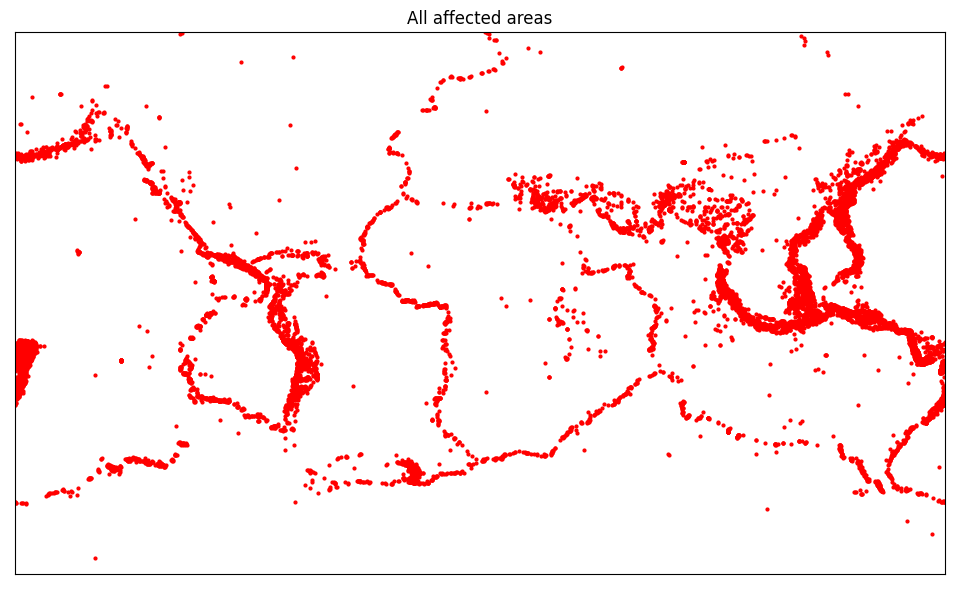

In [39]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
 #           resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'red')
#m.fillcontinents(color='green',lake_color='blue')
#m.drawmapboundary()
#m.drawcountries()
#m.bluemarble()
m.shadedrelief()
plt.show()

In [7]:
X = final_data[['Timestamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(15143, 3) (3786, 3) (15143, 2) (3786, 3)


In [8]:
from keras.models import Sequential
from keras.layers import Dense

def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

C:\Users\ayush\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [10]:
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=0)

# neurons = [16, 64, 128, 256]
neurons = [16]
# batch_size = [10, 20, 50, 100]
batch_size = [10]
epochs = [10]
# activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear', 'exponential']
activation = ['sigmoid', 'relu']
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
optimizer = ['SGD', 'Adadelta']
loss = ['squared_hinge']

param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)

C:\Users\ayush\AppData\Local\Temp\ipykernel_3300\372383517.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [43]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: 

In [11]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='squared_hinge', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, verbose=1)

[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/2
474/474 [==============================] - 2s 2ms/step - loss: 0.5035 - accuracy: 0.9840
Epoch 2/2
119/119 [==============================] - 1s 3ms/step - loss: 0.5021 - accuracy: 0.9781
Evaluation result on Test Data : Loss = 0.5021262764930725, accuracy = 0.9780771136283875
